In [12]:
import os

def print_folder_structure(root_dir, indent=0):
    for item in os.listdir(root_dir):
        path = os.path.join(root_dir, item)
        print("  " * indent + "📁 " + item if os.path.isdir(path) else "  " * indent + "📄 " + item)
        if os.path.isdir(path):
            print_folder_structure(path, indent + 1)

root_folder = r"C:\Users\ASUS\FacialEmo\images"
print("📂 Folder Structure for:", root_folder)
print_folder_structure(root_folder)


📂 Folder Structure for: C:\Users\ASUS\FacialEmo\images
📁 0
  📄 Anger.jpg
  📄 Contempt.jpg
  📄 Disgust.jpg
  📄 Fear.jpg
  📄 Happy.jpg
  📄 Neutral.jpg
  📄 Sad.jpg
  📄 Surprised.jpg
📁 1
  📄 Anger.jpg
  📄 Contempt.jpg
  📄 Disgust.jpg
  📄 Fear.jpg
  📄 Happy.jpg
  📄 Neutral.jpg
  📄 Sad.jpg
  📄 Surprised.jpg
📁 10
  📄 Anger.jpg
  📄 Contempt.jpg
  📄 Disgust.jpg
  📄 Fear.jpg
  📄 Happy.jpg
  📄 Neutral.jpg
  📄 Sad.jpg
  📄 Surprised.jpg
📁 11
  📄 Anger.jpg
  📄 Contempt.jpg
  📄 Disgust.jpg
  📄 Fear.jpg
  📄 Happy.jpg
  📄 Neutral.jpg
  📄 Sad.jpg
  📄 Surprised.jpg
📁 12
  📄 Anger.jpg
  📄 Contempt.jpg
  📄 Disgust.jpg
  📄 Fear.jpg
  📄 Happy.jpg
  📄 Neutral.jpg
  📄 Sad.jpg
  📄 Surprised.jpg
📁 13
  📄 Anger.jpg
  📄 Contempt.jpg
  📄 Disgust.jpg
  📄 Fear.jpg
  📄 Happy.jpg
  📄 Neutral.jpg
  📄 Sad.jpg
  📄 Surprised.jpg
📁 14
  📄 Anger.jpg
  📄 Contempt.jpg
  📄 Disgust.jpg
  📄 Fear.jpg
  📄 Happy.jpg
  📄 Neutral.jpg
  📄 Sad.jpg
  📄 Surprised.jpg
📁 15
  📄 Anger.jpg
  📄 Contempt.jpg
  📄 Disgust.jpg
  📄 Fear.jpg
  📄 Hap

In [13]:
import os
import pandas as pd

# Path setup
image_folder = r"C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/images"
metadata_path = r"C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/emotions.csv"

# Load metadata
df_metadata = pd.read_csv(metadata_path)
df_metadata["set_id"] = df_metadata["set_id"].astype(str)

# Read image info
data = []
for set_id in os.listdir(image_folder):
    set_path = os.path.join(image_folder, set_id)
    
    if os.path.isdir(set_path):
        for img_file in os.listdir(set_path):
            if img_file.endswith(".jpg"):
                emotion = img_file.replace(".jpg", "")
                img_path = os.path.join(set_path, img_file).replace("\\", "/")
                data.append([set_id, emotion, img_path])

# Create image DataFrame
df_images = pd.DataFrame(data, columns=["set_id", "emotion", "image_path"])
df_images["set_id"] = df_images["set_id"].astype(str)

# Merge with metadata
df_final = pd.merge(df_images, df_metadata, on="set_id", how="left")

# Preview final dataset
print("✅ Final Merged Dataset:")
print(df_final.head())
print("📊 Shape:", df_final.shape)


✅ Final Merged Dataset:
  set_id   emotion                                         image_path  gender  \
0      0     Anger  C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/imag...  FEMALE   
1      0  Contempt  C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/imag...  FEMALE   
2      0   Disgust  C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/imag...  FEMALE   
3      0      Fear  C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/imag...  FEMALE   
4      0     Happy  C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/imag...  FEMALE   

   age country  
0   36      RU  
1   36      RU  
2   36      RU  
3   36      RU  
4   36      RU  
📊 Shape: (152, 6)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26200\1974173198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x="gender", palette="Set2")


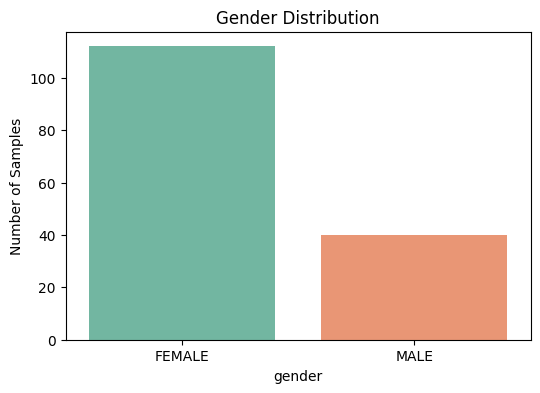

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x="gender", palette="Set2")
plt.title("Gender Distribution")
plt.ylabel("Number of Samples")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26200\687461507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x="emotion", order=sorted(df_final["emotion"].unique()), palette="Set3")


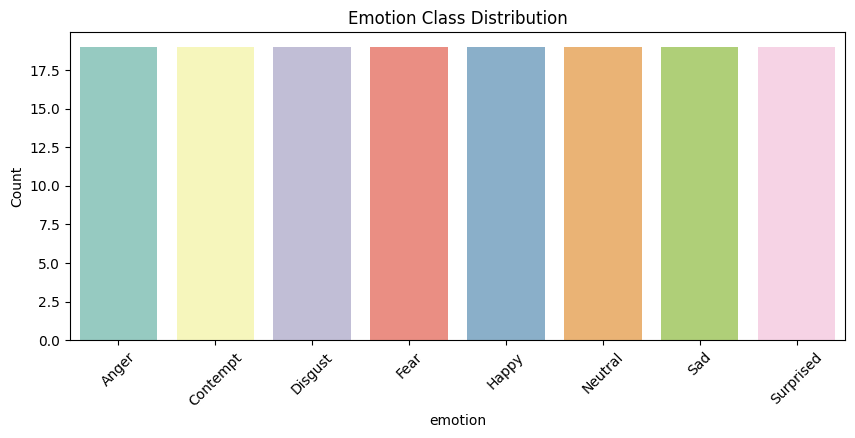

In [15]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_final, x="emotion", order=sorted(df_final["emotion"].unique()), palette="Set3")
plt.title("Emotion Class Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


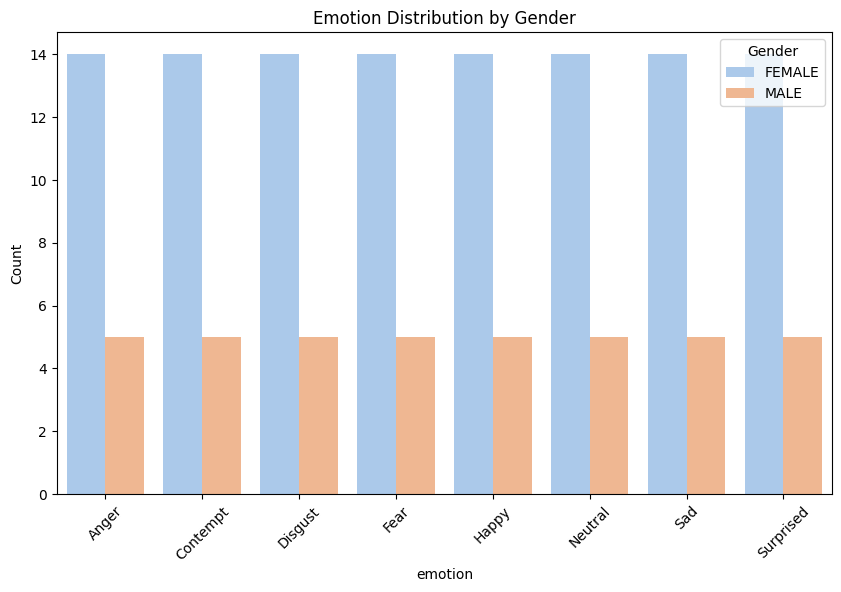

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x="emotion", hue="gender", palette="pastel")
plt.title("Emotion Distribution by Gender")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26200\1446515448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x="country", palette="coolwarm")


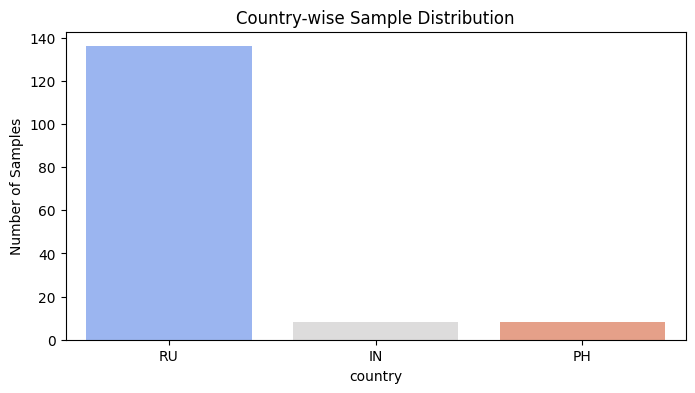

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_final, x="country", palette="coolwarm")
plt.title("Country-wise Sample Distribution")
plt.ylabel("Number of Samples")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26200\4114616173.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x="age_group", palette="magma")


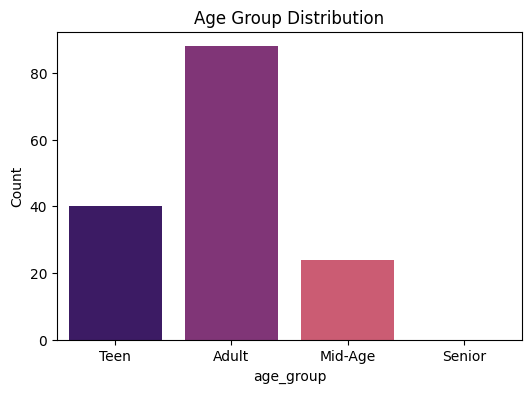

In [18]:
df_final["age_group"] = pd.cut(
    df_final["age"],
    bins=[0, 20, 40, 60, 100],
    labels=["Teen", "Adult", "Mid-Age", "Senior"]
)

plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x="age_group", palette="magma")
plt.title("Age Group Distribution")
plt.ylabel("Count")
plt.show()


In [19]:
! pip install albumentations


In [20]:
import os
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm
import pandas as pd

# Augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(p=0.3),
    A.Blur(blur_limit=3, p=0.3),
    A.RandomGamma(p=0.3)
])

# Output folder
output_folder = r"C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/augmented_images/"
os.makedirs(output_folder, exist_ok=True)

# Convert to age_group (if not already done)
df_final["age_group"] = pd.cut(
    df_final["age"],
    bins=[0, 20, 40, 60, 100],
    labels=["Teen", "Adult", "Mid-Age", "Senior"]
)

# Augmentation targeting underrepresented groups
new_data = []
counts = {
    "MALE": 0,
    "IN": 0,
    "PH": 0,
    "AGE_GROUP": {"Teen": 0, "Mid-Age": 0, "Senior": 0}
}

for index, row in tqdm(df_final.iterrows(), total=len(df_final)):
    img_path = row["image_path"]
    gender = row["gender"]
    country = row["country"]
    age_group = row["age_group"]
    
    should_augment = False

    # Check conditions for bias-aware augmentation
    if gender == "MALE":
        counts["MALE"] += 1
        should_augment = True
    if country in ["IN", "PH"]:
        counts[country] += 1
        should_augment = True
    if age_group in ["Teen", "Mid-Age", "Senior"]:
        counts["AGE_GROUP"][str(age_group)] += 1
        should_augment = True

    if should_augment:
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        for i in range(5):  # Generate 5 augmented samples per image
            augmented = augmentations(image=img)["image"]
            new_img_name = f"{row['set_id']}_{row['emotion']}_aug{i}.jpg"
            new_img_path = os.path.join(output_folder, new_img_name)
            cv2.imwrite(new_img_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))
            
            new_data.append([
                row["set_id"], row["emotion"], new_img_path,
                row["gender"], row["age"], row["country"], age_group
            ])

# Create augmented DataFrame
df_aug = pd.DataFrame(new_data, columns=df_final.columns)

# Combine with original data
df_balanced = pd.concat([df_final, df_aug], ignore_index=True)

# Save to CSV
df_balanced.to_csv("C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/augmented_emotions.csv", index=False)

print("\n✅ Augmentation Complete!")
print("📊 New Dataset Shape:", df_balanced.shape)
print("📈 Augmented Counts:", counts)


100%|████████████████████████████████████████| 152/152 [01:34<00:00,  1.61it/s]


✅ Augmentation Complete!
📊 New Dataset Shape: (552, 7)
📈 Augmented Counts: {'MALE': 40, 'IN': 8, 'PH': 8, 'AGE_GROUP': {'Teen': 40, 'Mid-Age': 24, 'Senior': 0}}


In [22]:
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch


In [23]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # Standard ImageNet mean/std
        std=[0.229, 0.224, 0.225]
    )
])


In [24]:
class EmotionDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.label_map = {
            'Anger': 0, 'Contempt': 1, 'Disgust': 2,
            'Fear': 3, 'Happy': 4, 'Neutral': 5,
            'Sad': 6, 'Surprised': 7
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = row['image_path']
        label = self.label_map.get(row['emotion'], -1)

        try:
            image = Image.open(img_path).convert('RGB')
        except:
            print(f"❌ Error loading: {img_path}")
            return None, None

        if self.transform:
            image = self.transform(image)

        return image, label


In [25]:
csv_path = r"C:/Users/ASUS/FacialEmo/BiasFreeEmoDetect/augmented_emotions.csv"
dataset = EmotionDataset(csv_file=csv_path, transform=train_transforms)

# Use num_workers=0 for Windows
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)


In [26]:
for images, labels in dataloader:
    if images is None or labels is None:
        continue
    print("✅ DataLoader working!")
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    break


✅ DataLoader working!
Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32])


In [27]:
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN(num_classes=8).to(device)

# Class weights for fairness
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = dataset.data["emotion"].map({
    'Anger': 0, 'Contempt': 1, 'Disgust': 2,
    'Fear': 3, 'Happy': 4, 'Neutral': 5,
    'Sad': 6, 'Surprised': 7
})
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [29]:
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = 100 * correct / total
        print(f"📘 Epoch {epoch+1}/{epochs} | Loss: {total_loss:.4f} | Accuracy: {acc:.2f}%")

train_model(model, dataloader, criterion, optimizer, epochs=10)


📘 Epoch 1/10 | Loss: 445.8101 | Accuracy: 12.86%
📘 Epoch 2/10 | Loss: 39.0569 | Accuracy: 12.68%
📘 Epoch 3/10 | Loss: 37.4468 | Accuracy: 12.50%
📘 Epoch 4/10 | Loss: 37.4346 | Accuracy: 12.50%
📘 Epoch 5/10 | Loss: 37.4407 | Accuracy: 12.50%
📘 Epoch 6/10 | Loss: 37.4397 | Accuracy: 12.50%
📘 Epoch 7/10 | Loss: 37.4435 | Accuracy: 12.50%
📘 Epoch 8/10 | Loss: 37.4341 | Accuracy: 12.50%
📘 Epoch 9/10 | Loss: 37.4298 | Accuracy: 12.50%
📘 Epoch 10/10 | Loss: 37.4305 | Accuracy: 12.50%


In [30]:
# Map labels
label_map = {
    'Anger': 0, 'Contempt': 1, 'Disgust': 2,
    'Fear': 3, 'Happy': 4, 'Neutral': 5,
    'Sad': 6, 'Surprised': 7
}

# Print check
print("Emotions found in dataset:", sorted(dataset.data["emotion"].unique()))
print("Label mapping:", label_map)


Emotions found in dataset: ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
Label mapping: {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happy': 4, 'Neutral': 5, 'Sad': 6, 'Surprised': 7}


In [31]:
class EmotionDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.label_map = {
            'Anger': 0, 'Contempt': 1, 'Disgust': 2,
            'Fear': 3, 'Happy': 4, 'Neutral': 5,
            'Sad': 6, 'Surprised': 7
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = row['image_path']
        emotion = row['emotion']
        label = self.label_map.get(emotion, -1)

        if label == -1:
            print(f"⚠️ Invalid label for: {emotion}")
            return None, None

        try:
            image = Image.open(img_path).convert('RGB')
        except:
            print(f"❌ Error loading: {img_path}")
            return None, None

        if self.transform:
            image = self.transform(image)

        return image, label


In [32]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2)

        self.fc1 = nn.Linear(64 * 56 * 56, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


In [33]:
model = CustomCNN(num_classes=8).to(device)
criterion = nn.CrossEntropyLoss()  # ⛔ No weights yet
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [34]:
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        predicted_classes = []

        for images, labels in dataloader:
            if images is None or labels is None:
                continue

            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            predicted_classes.extend(predicted.cpu().tolist())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = 100 * correct / total
        print(f"📘 Epoch {epoch+1}/{epochs} | Loss: {total_loss:.4f} | Accuracy: {acc:.2f}%")
        print(f"🧠 Predictions (first 10): {predicted_classes[:10]}")


In [35]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(CustomCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, 256),  # Works for input 224x224
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [36]:
def train_model(model, dataloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total = 0
        correct = 0
        predictions = []

        for images, labels in dataloader:
            if images is None or labels is None or len(images) == 0:
                continue  # Skip broken batches

            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy().tolist())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = 100 * correct / total if total > 0 else 0
        print(f"📘 Epoch {epoch+1} | Loss: {total_loss:.4f} | Accuracy: {acc:.2f}%")
        print(f"🧠 Predicted Labels Sample: {predictions[:10]}")


In [37]:
model = CustomCNN(num_classes=8).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_model(model, dataloader, criterion, optimizer, epochs=5)


📘 Epoch 1 | Loss: 60.1823 | Accuracy: 14.31%
🧠 Predicted Labels Sample: [2, 1, 1, 2, 5, 5, 5, 3, 5, 5]
📘 Epoch 2 | Loss: 37.3939 | Accuracy: 12.86%
🧠 Predicted Labels Sample: [4, 5, 5, 4, 4, 4, 4, 4, 4, 4]
📘 Epoch 3 | Loss: 35.9890 | Accuracy: 29.35%
🧠 Predicted Labels Sample: [2, 4, 5, 4, 4, 2, 6, 4, 4, 4]
📘 Epoch 4 | Loss: 29.7316 | Accuracy: 45.11%
🧠 Predicted Labels Sample: [1, 3, 1, 2, 2, 5, 6, 1, 5, 5]
📘 Epoch 5 | Loss: 19.9113 | Accuracy: 65.94%
🧠 Predicted Labels Sample: [3, 1, 6, 1, 6, 3, 4, 3, 7, 4]


In [38]:
torch.save(model.state_dict(), "custom_cnn_trained.pth")
print("📁 Model saved as custom_cnn_trained.pth")


📁 Model saved as custom_cnn_trained.pth


In [39]:
train_model(model, dataloader, criterion, optimizer, epochs=20)


📘 Epoch 1 | Loss: 11.2028 | Accuracy: 82.61%
🧠 Predicted Labels Sample: [0, 1, 6, 2, 1, 7, 7, 2, 7, 7]
📘 Epoch 2 | Loss: 5.7917 | Accuracy: 91.49%
🧠 Predicted Labels Sample: [4, 1, 0, 2, 1, 1, 3, 2, 0, 2]
📘 Epoch 3 | Loss: 4.2192 | Accuracy: 94.93%
🧠 Predicted Labels Sample: [6, 6, 2, 7, 1, 0, 3, 5, 1, 7]
📘 Epoch 4 | Loss: 3.1304 | Accuracy: 94.75%
🧠 Predicted Labels Sample: [2, 5, 6, 3, 0, 3, 5, 1, 5, 4]
📘 Epoch 5 | Loss: 2.3022 | Accuracy: 96.38%
🧠 Predicted Labels Sample: [2, 2, 2, 0, 3, 3, 0, 3, 2, 6]
📘 Epoch 6 | Loss: 1.1145 | Accuracy: 98.19%
🧠 Predicted Labels Sample: [2, 5, 4, 5, 5, 2, 3, 7, 2, 0]
📘 Epoch 7 | Loss: 1.1616 | Accuracy: 97.83%
🧠 Predicted Labels Sample: [2, 1, 2, 5, 4, 4, 6, 1, 2, 5]
📘 Epoch 8 | Loss: 1.1956 | Accuracy: 98.01%
🧠 Predicted Labels Sample: [0, 6, 2, 4, 6, 3, 3, 7, 0, 3]
📘 Epoch 9 | Loss: 0.5493 | Accuracy: 99.46%
🧠 Predicted Labels Sample: [6, 4, 5, 1, 5, 1, 1, 3, 4, 4]
📘 Epoch 10 | Loss: 1.1435 | Accuracy: 98.37%
🧠 Predicted Labels Sample: [1, 4, 7,

In [40]:
torch.save(model.state_dict(), "custom_cnn_best.pth")
print("✅ Model saved as custom_cnn_best.pth")


✅ Model saved as custom_cnn_best.pth


In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
import numpy as np

# Put model in eval mode
model.eval()

all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in dataloader:
        if images is None:
            continue
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        _, preds = torch.max(probs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to arrays
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)
all_labels = np.array(all_labels)


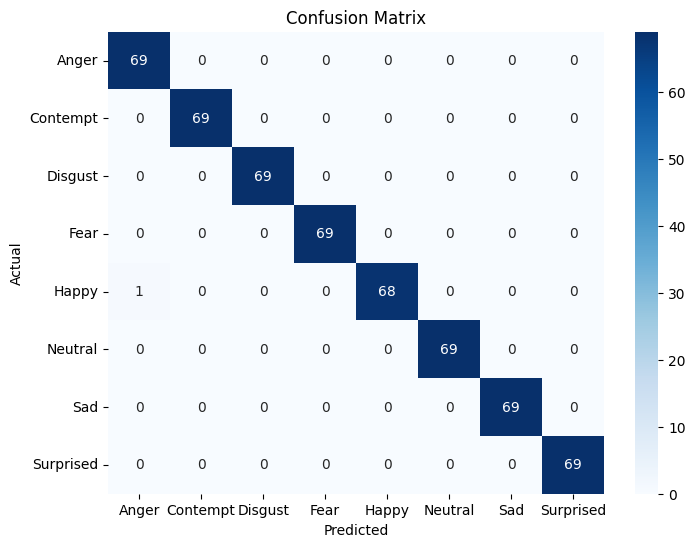

In [42]:
emotion_labels = list(dataset.label_map.keys())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [43]:
report = classification_report(all_labels, all_preds, target_names=emotion_labels)
print("📋 Classification Report:\n", report)


📋 Classification Report:
               precision    recall  f1-score   support

       Anger       0.99      1.00      0.99        69
    Contempt       1.00      1.00      1.00        69
     Disgust       1.00      1.00      1.00        69
        Fear       1.00      1.00      1.00        69
       Happy       1.00      0.99      0.99        69
     Neutral       1.00      1.00      1.00        69
         Sad       1.00      1.00      1.00        69
   Surprised       1.00      1.00      1.00        69

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552



📈 Macro AUC-ROC: 1.0000


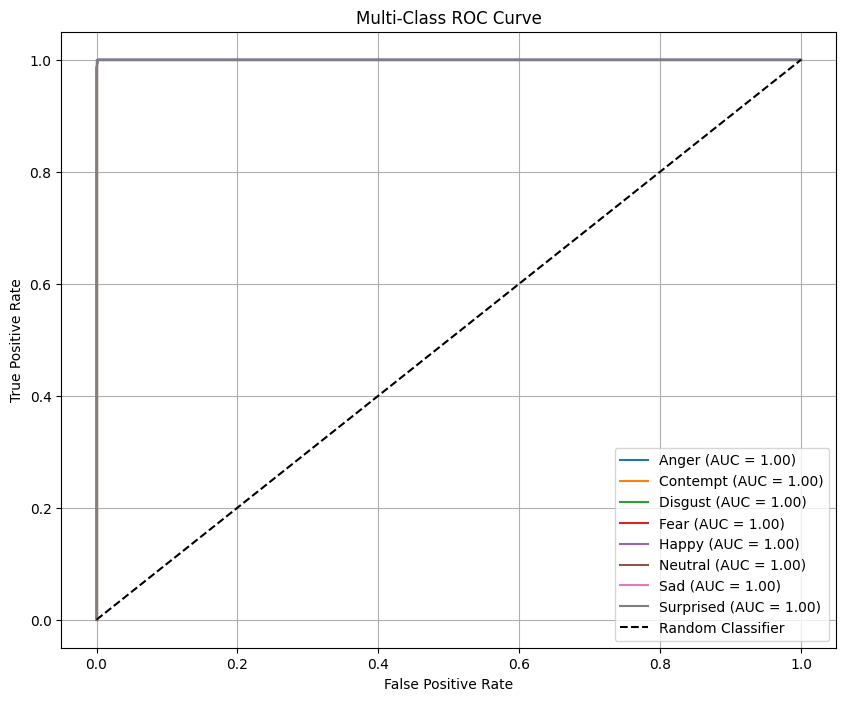

In [44]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Binarize labels
all_labels_bin = label_binarize(all_labels, classes=range(len(emotion_labels)))

# Compute AUC
roc_auc = roc_auc_score(all_labels_bin, all_probs, average="macro", multi_class="ovr")
print(f"📈 Macro AUC-ROC: {roc_auc:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(emotion_labels)):
    fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
    plt.plot(fpr, tpr, label=f"{emotion_labels[i]} (AUC = {roc_auc_score(all_labels_bin[:, i], all_probs[:, i]):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [45]:
import torchvision.models as models
import torch.nn as nn

# Load pretrained ResNet18
resnet_model = models.resnet18(pretrained=True)

# Replace final FC layer
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, 8)  # 8 emotion classes

# Move to device
resnet_model = resnet_model.to(device)


C:\Users\ASUS\FacialEmo\BiasFreeEmoDetect\BiasEmoEnv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ASUS\FacialEmo\BiasFreeEmoDetect\BiasEmoEnv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\ASUS/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████| 44.7M/44.7M [00:05<00:00, 9.06MB/s]


In [46]:
for param in resnet_model.parameters():
    param.requires_grad = False

for param in resnet_model.fc.parameters():
    param.requires_grad = True


In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=0.001)


In [48]:
def train_resnet(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total = 0
        correct = 0
        all_preds = []

        for images, labels in dataloader:
            if images is None or labels is None:
                continue
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().tolist())
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        acc = 100 * correct / total
        print(f"📘 Epoch {epoch+1} | Loss: {total_loss:.4f} | Accuracy: {acc:.2f}%")
        print(f"🧠 Predicted Labels Sample: {all_preds[:10]}")


In [49]:
train_resnet(resnet_model, dataloader, criterion, optimizer, epochs=10)


📘 Epoch 1 | Loss: 39.4749 | Accuracy: 15.40%
🧠 Predicted Labels Sample: [6, 6, 6, 2, 6, 2, 6, 1, 2, 6]
📘 Epoch 2 | Loss: 36.5879 | Accuracy: 19.75%
🧠 Predicted Labels Sample: [2, 0, 0, 0, 0, 2, 3, 1, 2, 0]
📘 Epoch 3 | Loss: 34.7675 | Accuracy: 31.34%
🧠 Predicted Labels Sample: [3, 2, 4, 3, 3, 3, 7, 3, 3, 4]
📘 Epoch 4 | Loss: 33.1289 | Accuracy: 34.78%
🧠 Predicted Labels Sample: [6, 2, 5, 1, 1, 6, 7, 6, 6, 4]
📘 Epoch 5 | Loss: 31.7926 | Accuracy: 40.40%
🧠 Predicted Labels Sample: [5, 2, 4, 5, 5, 2, 2, 0, 7, 2]
📘 Epoch 6 | Loss: 30.7864 | Accuracy: 45.11%
🧠 Predicted Labels Sample: [6, 0, 2, 4, 0, 1, 7, 6, 1, 0]
📘 Epoch 7 | Loss: 29.3452 | Accuracy: 50.18%
🧠 Predicted Labels Sample: [0, 2, 0, 5, 4, 1, 7, 2, 2, 0]
📘 Epoch 8 | Loss: 28.1604 | Accuracy: 58.70%
🧠 Predicted Labels Sample: [1, 3, 6, 6, 6, 2, 6, 4, 6, 4]
📘 Epoch 9 | Loss: 27.0848 | Accuracy: 61.05%
🧠 Predicted Labels Sample: [0, 5, 7, 3, 3, 6, 7, 6, 3, 6]
📘 Epoch 10 | Loss: 26.3517 | Accuracy: 64.31%
🧠 Predicted Labels Sample: 

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torch.utils.data import DataLoader
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


In [51]:
resnet_model = models.resnet18(pretrained=True)

# Replace final fully connected layer
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, 8)  # 8 emotion classes
resnet_model = resnet_model.to(device)


In [52]:
for param in resnet_model.parameters():
    param.requires_grad = True


In [53]:
labels = dataset.data["emotion"].map(dataset.label_map)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(labels),
                                     y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)


In [54]:
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [55]:
def train_resnet18(model, dataloader, criterion, optimizer, scheduler, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total = 0
        correct = 0
        all_preds = []

        for images, labels in dataloader:
            if images is None or labels is None:
                continue
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().tolist())
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        scheduler.step()

        acc = 100 * correct / total
        print(f"📘 Epoch {epoch+1}/{epochs} | Loss: {total_loss:.4f} | Accuracy: {acc:.2f}%")
        print(f"🧠 Predicted Labels Sample: {all_preds[:10]}")


In [56]:
train_resnet18(resnet_model, dataloader, criterion, optimizer, scheduler, epochs=20)


📘 Epoch 1/20 | Loss: 38.2468 | Accuracy: 22.46%
🧠 Predicted Labels Sample: [6, 6, 6, 7, 6, 6, 6, 6, 6, 6]
📘 Epoch 2/20 | Loss: 24.2719 | Accuracy: 49.28%
🧠 Predicted Labels Sample: [7, 1, 5, 4, 7, 5, 7, 1, 7, 0]
📘 Epoch 3/20 | Loss: 17.4769 | Accuracy: 63.41%
🧠 Predicted Labels Sample: [2, 0, 2, 2, 0, 6, 2, 6, 3, 6]
📘 Epoch 4/20 | Loss: 11.2226 | Accuracy: 77.36%
🧠 Predicted Labels Sample: [2, 6, 5, 0, 4, 0, 7, 0, 6, 6]
📘 Epoch 5/20 | Loss: 7.3435 | Accuracy: 84.60%
🧠 Predicted Labels Sample: [4, 2, 0, 5, 6, 1, 3, 6, 0, 7]
📘 Epoch 6/20 | Loss: 3.4024 | Accuracy: 94.75%
🧠 Predicted Labels Sample: [0, 6, 0, 2, 4, 7, 4, 0, 6, 6]
📘 Epoch 7/20 | Loss: 1.6070 | Accuracy: 98.01%
🧠 Predicted Labels Sample: [6, 6, 0, 2, 3, 0, 7, 7, 5, 3]
📘 Epoch 8/20 | Loss: 1.5437 | Accuracy: 98.19%
🧠 Predicted Labels Sample: [6, 7, 6, 7, 2, 6, 1, 4, 4, 4]
📘 Epoch 9/20 | Loss: 1.7105 | Accuracy: 97.46%
🧠 Predicted Labels Sample: [6, 2, 4, 6, 4, 3, 6, 6, 0, 3]
📘 Epoch 10/20 | Loss: 0.8643 | Accuracy: 98.73%
🧠 P

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
import numpy as np

# Make sure model is in eval mode
resnet_model.eval()

# Collect predictions
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in dataloader:
        if images is None:
            continue
        images = images.to(device)
        labels = labels.to(device)

        outputs = resnet_model(images)
        probs = F.softmax(outputs, dim=1)
        _, preds = torch.max(probs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to arrays
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)
all_labels = np.array(all_labels)


In [58]:
emotion_labels = list(dataset.label_map.keys())

report = classification_report(all_labels, all_preds, target_names=emotion_labels)
print("📋 Classification Report:\n", report)


📋 Classification Report:
               precision    recall  f1-score   support

       Anger       0.99      1.00      0.99        69
    Contempt       1.00      1.00      1.00        69
     Disgust       1.00      1.00      1.00        69
        Fear       1.00      1.00      1.00        69
       Happy       1.00      0.99      0.99        69
     Neutral       1.00      1.00      1.00        69
         Sad       1.00      1.00      1.00        69
   Surprised       1.00      1.00      1.00        69

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552



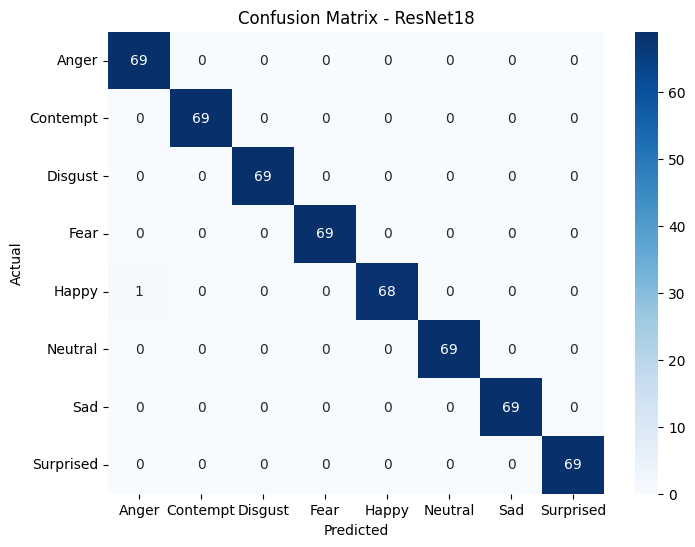

In [59]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title("Confusion Matrix - ResNet18")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📈 Macro AUC-ROC: 1.0000


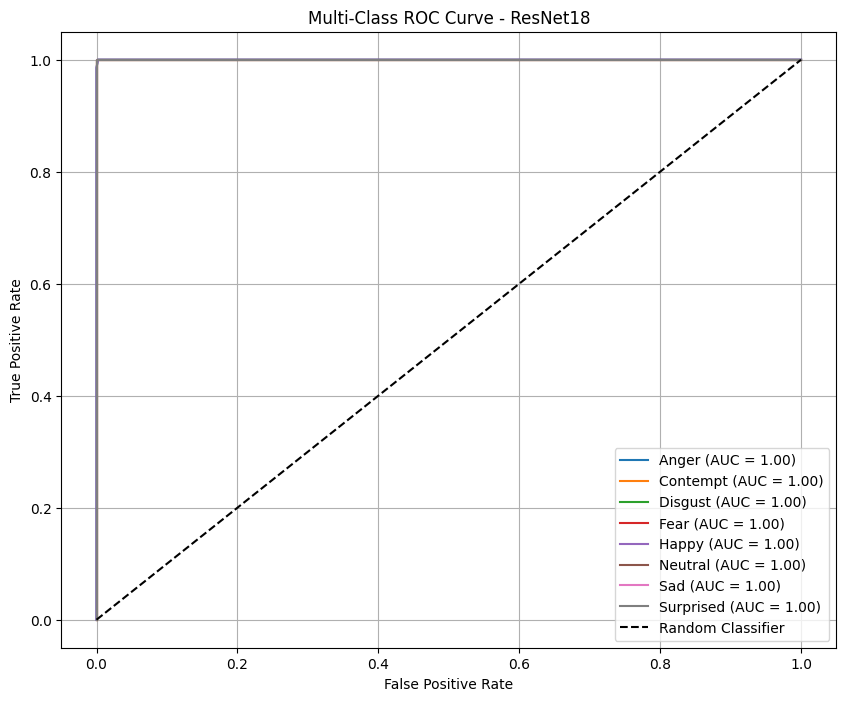

In [60]:
# One-hot encode true labels
all_labels_bin = label_binarize(all_labels, classes=range(len(emotion_labels)))

# Macro AUC-ROC
roc_auc = roc_auc_score(all_labels_bin, all_probs, average="macro", multi_class="ovr")
print(f"📈 Macro AUC-ROC: {roc_auc:.4f}")

# ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(emotion_labels)):
    fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
    auc = roc_auc_score(all_labels_bin[:, i], all_probs[:, i])
    plt.plot(fpr, tpr, label=f"{emotion_labels[i]} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("Multi-Class ROC Curve - ResNet18")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
